In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

Read the files

In [2]:
base = ".\\results_swat_2h\\"
fail_list_swat = []
spars_list_swat = []
total_list_swat = []
valid_list_swat = []
for file in os.listdir(base):
    path = os.path.join(base, file)
    data = pd.read_csv(os.path.join(path,"generation_stats.csv"))
    failures = int(data["test_failed"])
    tot = int(data["test_generated"])
    valid = int(data["test_valid"])

    total_list_swat.append(tot)
    valid_list_swat.append(valid)
    fail_list_swat.append(failures)
    if os.path.exists(os.path.join(path,"oob_stats.csv")):
        data_sp = pd.read_csv(os.path.join(path,"oob_stats.csv"))
        sparsity = float(data_sp["avg_sparseness"])
        spars_list_swat.append(sparsity)
        


In [3]:
base = ".\\results_frenetic_2h\\"
fail_list_fr = []
spars_list_fr = []
total_list_fr = []
valid_list_fr = []
for file in os.listdir(base):
    path = os.path.join(base, file)
    data = pd.read_csv(os.path.join(path,"generation_stats.csv"))
    failures = int(data["test_failed"])
    fail_list_fr.append(failures)
    tot = int(data["test_generated"])
    valid = int(data["test_valid"])
    total_list_fr.append(tot)
    valid_list_fr.append(valid)
    if os.path.exists(os.path.join(path,"oob_stats.csv")):
        data_sp = pd.read_csv(os.path.join(path,"oob_stats.csv"))
        sparsity = float(data_sp["avg_sparseness"])
        spars_list_fr.append(sparsity)

In [6]:
base = ".\\results_random_generator_2h\\"
fail_list_ran = []
spars_list_ran = []
total_list_ran = []
valid_list_ran = []
for file in os.listdir(base):
    path = os.path.join(base, file)
    
    data = pd.read_csv(os.path.join(path,"generation_stats.csv"))
    failures = int(data["test_failed"])
    fail_list_ran.append(failures)
    tot = int(data["test_generated"])
    valid = int(data["test_valid"])

    total_list_ran.append(tot)
    valid_list_ran.append(valid)
    if os.path.exists(os.path.join(path,"oob_stats.csv")):
        data_sp = pd.read_csv(os.path.join(path,"oob_stats.csv"))
        sparsity = float(data_sp["avg_sparseness"])
        if sparsity > 1:
            spars_list_ran.append(float(sparsity))

In [7]:
base = ".\\results_random_search_2h\\"
fail_list_ran_s = []
spars_list_ran_s = []
total_list_ran_s = []
valid_list_ran_s = []
for file in os.listdir(base):
    path = os.path.join(base, file)
    
    data = pd.read_csv(os.path.join(path,"generation_stats.csv"))
    failures = int(data["test_failed"])
    fail_list_ran_s.append(failures)
    tot = int(data["test_generated"])
    valid = int(data["test_valid"])

    total_list_ran_s.append(tot)
    valid_list_ran_s.append(valid)
    if os.path.exists(os.path.join(path,"oob_stats.csv")):
        data_sp = pd.read_csv(os.path.join(path,"oob_stats.csv"))
        sparsity = float(data_sp["avg_sparseness"])
        spars_list_ran_s.append(sparsity)

In [8]:
ratio_list_ran_s = np.divide(valid_list_ran_s, total_list_ran_s)
ratio_list_ran = np.divide(valid_list_ran, total_list_ran)
ratio_list_fr = np.divide(valid_list_fr, total_list_fr)
ratio_list_swat = np.divide(valid_list_swat, total_list_swat)

In [9]:
full_fail =[7, 9, 2, 7, 5, 8, 7, 7, 9, 2, 7, 5, 8, 7, 4, 3, 7, 9, 5, 8, 3]
full_spars = [25, 28, 30, 31, 25, 24, 22, 28]

In [10]:
y1 = [fail_list_swat, fail_list_fr, fail_list_ran, fail_list_ran_s, full_fail]

x1 = ["AmbieGen", "Frenetic",  "Random_gen", "RS", "Full_model"]
y2 = [spars_list_swat, spars_list_fr, spars_list_ran, spars_list_ran_s, full_spars]
y3 = [ratio_list_swat, ratio_list_fr, ratio_list_ran, ratio_list_ran_s]

Build boxplots

In [11]:
def build_boxplot_f(y1, x1):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.set_xlabel('2h experiment', fontsize=20)
    ax1.set_ylabel('Revealed faults', fontsize=20)
       
    ax1.set_xticklabels(x1, fontsize=16, rotation=0)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='darkgray', alpha=0.7)

    top = 30
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.boxplot(y1)
    
    ax1.tick_params(axis='y', labelsize=20)


<ipython-input-11-01442a58857f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, fontsize=16, rotation=0)


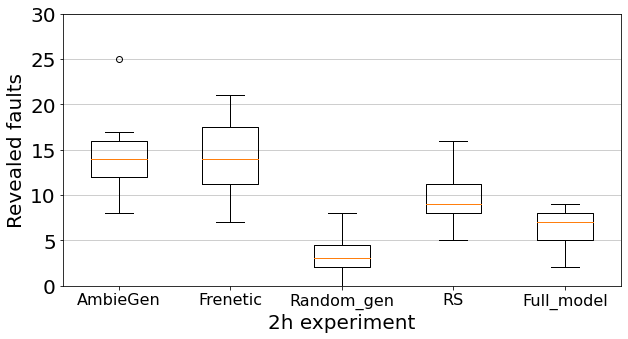

In [12]:
build_boxplot_f(y1, x1)

In [13]:
def build_boxplot_s(y1, x1):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.set_xlabel('2h experiment', fontsize=20)
    ax1.set_ylabel('Fault diversity', fontsize=20)
        
    ax1.set_xticklabels(x1, fontsize=16, rotation=0)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='darkgray', alpha=0.7)
    top = 40
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.boxplot(y1)
    
    ax1.tick_params(axis='y', labelsize=20)

<ipython-input-13-c817b53bab03>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, fontsize=16, rotation=0)


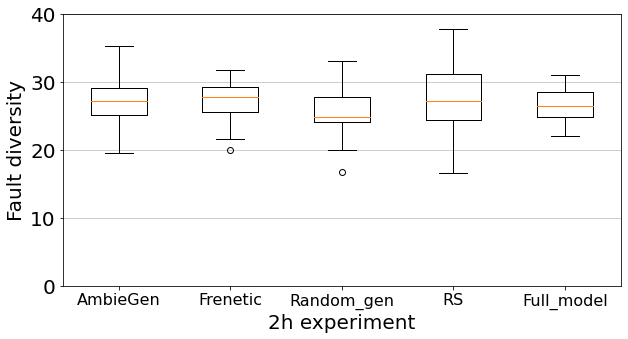

In [14]:
build_boxplot_s(y2, x1)

In [15]:
def build_boxplot_r(y1, x1):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.set_xlabel('2h experiment', fontsize=20)
    ax1.set_ylabel('Revealed faults', fontsize=20)
    
    ax1.set_xticklabels(x1, fontsize=16, rotation=0)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='darkgray', alpha=0.7)
    top = 1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.boxplot(y1)
    
    ax1.tick_params(axis='y', labelsize=20)

<ipython-input-15-af9b2339c5a6>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, fontsize=16, rotation=0)


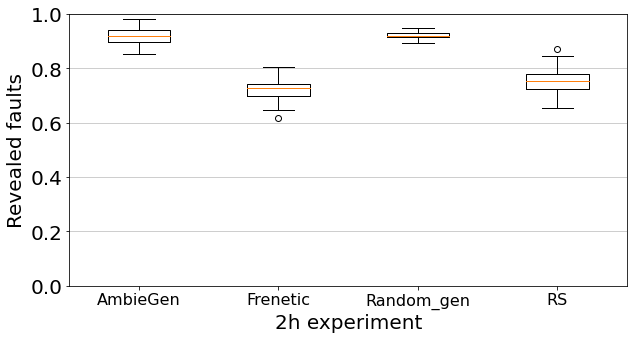

In [16]:
build_boxplot_r(y3, x1)

Run statistical tests

In [123]:
list1=ratio_list_ran
list2=ratio_list_ran_s
from scipy.stats import mannwhitneyu
mannwhitneyu(list1, list2, alternative="two-sided")

MannwhitneyuResult(statistic=532.0, pvalue=8.56521167104252e-09)

In [124]:
from cliffsDelta import cliffsDelta
d, res = cliffsDelta(list1, list2)
(d, res)

(1.0, 'large')